In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import scienceplots

In [11]:
plt.style.use(['science', 'no-latex'])

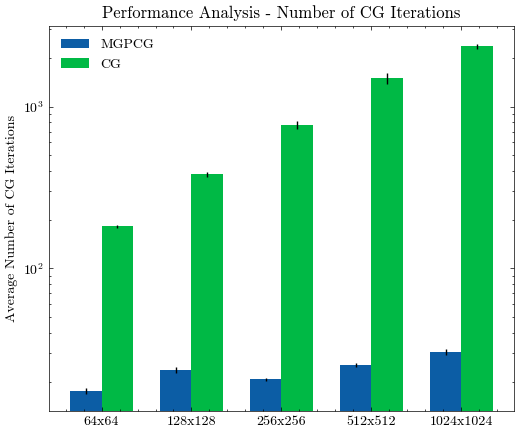

In [23]:
# Load data
resolutions = ['64x64', '128x128', '256x256', '512x512', '1024x1024']
single_resolutions = ['64', '128', '256', '512', '1024']
mgpcg_data = []
cg_data = []

for res in single_resolutions:
    mgpcg_data.append(np.loadtxt(f"experiments/2d/mgpcg/{res}/n_cg_over_it.dat"))
    cg_data.append(np.loadtxt(f"experiments/2d/conjugate_gradient/{res}/n_cg_over_it.dat"))

# Calculate average and standard deviation for each resolution
mgpcg_avg = [np.mean(data, axis=0) for data in mgpcg_data]
cg_avg = [np.mean(data, axis=0) for data in cg_data]
mgpcg_std = [np.std(data, axis=0) for data in mgpcg_data]
cg_std = [np.std(data, axis=0) for data in cg_data]

# Plotting
labels = ['64x64', '128x128', '256x256', '512x512', '1024x1024']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 5))
rects1 = ax.bar(x - width/2, mgpcg_avg, width, label='MGPCG', yerr=mgpcg_std)
rects2 = ax.bar(x + width/2, cg_avg, width, label='CG', yerr=cg_std)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Number of CG Iterations')
ax.set_title('Performance Analysis - Number of CG Iterations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale("log")
ax.legend()
plt.savefig("average_cg_iterations.pdf", format="pdf")
plt.show()

In [13]:
# print table of grid size, mean and std
print("Grid size\tMGPCG mean\tMGPCG std\tCG mean\tCG std")
for i in range(len(resolutions)):
    print(f"{resolutions[i]}\t{mgpcg_avg[i]}\t{mgpcg_std[i]}\t{cg_avg[i]}\t{cg_std[i]}")

Grid size	MGPCG mean	MGPCG std	CG mean	CG std
64x64	17.58084197681513	0.7188894043166871	182.08785845027455	3.8854359861431753
128x128	23.670731707317074	0.9538737203427399	380.9329268292683	13.716702964421087
256x256	20.666666666666668	0.4714045207910317	771.2167300380228	45.02051270490255
512x512	25.272727272727273	0.616575453011388	1493.2666666666667	109.02915876185351
1024x1024	30.571428571428573	1.4166166457755731	2362.4	89.50217874443057


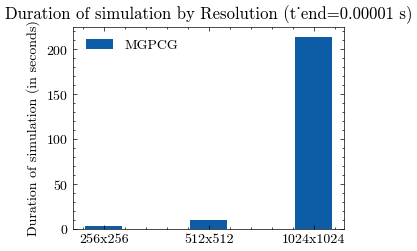

In [14]:
# Load data
resolutions = ['256x256', '512x512', '1024x1024']
time = {
    '256': 2.837,
    '512': 10.323,
    '1024': 214.252
}
single_resolutions = ['256', '512', '1024']
mgpcg_data = []

for res in single_resolutions:
    mgpcg_data.append(
        time[res]
    )

# Get the last item of each array
mgpcg_duration = [data for data in mgpcg_data]

# Plotting
labels = ['256x256', '512x512', '1024x1024']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, mgpcg_duration, width, label='MGPCG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration of simulation (in seconds)')
ax.set_title('Duration of simulation by Resolution (t_end=0.00001 s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# dont lay legend over bars
ax.legend(loc='upper left')
plt.savefig("duration_of_simulation.pdf", format="pdf")
plt.show()

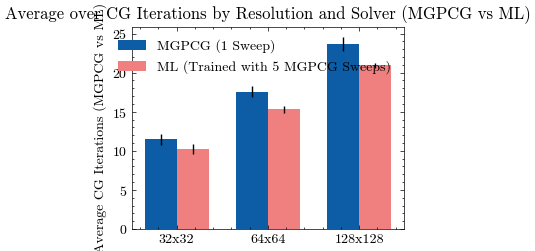

In [15]:
# Load data
resolutions = ['32x32', '64x64', '128x128']
single_resolutions = ['32', '64', '128']
mgpcg_data = []
ml_data = []

for res in single_resolutions:
    mgpcg_data.append(np.loadtxt(f"experiments/2d/mgpcg/{res}/n_cg_over_it.dat"))
    ml_data.append(np.loadtxt(f"experiments/2d/ml/{res}/n_cg_over_it.dat"))

# Calculate average and standard deviation for each resolution
mgpcg_avg = [np.mean(data, axis=0) for data in mgpcg_data]
ml_avg = [np.mean(data, axis=0) for data in ml_data]
mgpcg_std = [np.std(data, axis=0) for data in mgpcg_data]
ml_std = [np.std(data, axis=0) for data in ml_data]

# Plotting
labels = ['32x32', '64x64', '128x128']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mgpcg_avg, width, label='MGPCG (1 Sweep)', yerr=mgpcg_std)
rects2 = ax.bar(x + width/2, ml_avg, width, label='ML (Trained with 5 MGPCG Sweeps)', yerr=ml_std, color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average CG Iterations (MGPCG vs ML)')
ax.set_title('Average over CG Iterations by Resolution and Solver (MGPCG vs ML)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("average_ml_iterations.pdf", format="pdf")
plt.show()

In [16]:
# print table of grid size, mean and std
print("Grid size\tMGPCG mean\tMGPCG std\ML mean\tML std")
for i in range(len(resolutions)):
    print(f"{resolutions[i]}\t{mgpcg_avg[i]}\t{mgpcg_std[i]}\t{ml_avg[i]}\t{ml_std[i]}")

Grid size	MGPCG mean	MGPCG std\ML mean	ML std
32x32	11.494375	0.6934737625714473	10.2040625	0.6105190382729682
64x64	17.58084197681513	0.7188894043166871	15.316046369737645	0.47144707357493193
128x128	23.670731707317074	0.9538737203427399	20.948170731707318	0.29279405918595164


In [17]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

u_ml = np.loadtxt("experiments/2d/ml/u.dat")
v_ml = np.loadtxt("experiments/2d/ml/v.dat")

u_ml = u_ml[1:-1, 1:-1]
v_ml = v_ml[1:-1, 1:-1]

scale_factor = 4
u_ml = np.kron(u_ml, np.ones((scale_factor, scale_factor)))
v_ml = np.kron(v_ml, np.ones((scale_factor, scale_factor)))

# plot u
u_ml = u_ml[:, int(u_ml.shape[1]/2)]
v_ml = v_ml[int(v_ml.shape[0]/2), :]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# Plot u and its reference
axes[0].plot(u_ml, label="ML")
axes[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label="Ghia et al. (1982)")
axes[0].set_title("Velocity Component u")
axes[0].set_xlabel("y")
axes[0].set_ylabel("u")
axes[0].legend()

# Plot v and its reference
axes[1].plot(v_ml, label="ML")
# plot v_mid as scatter plot
axes[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label="Ghia et al. (1982)")
axes[1].set_title("Velocity Component v")
axes[1].set_xlabel("x")
axes[1].set_ylabel("v")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("ghia_32_ml.pdf", format="pdf")
plt.show()

FileNotFoundError: experiments/2d/ml/u.dat not found.